```
  _________ ____________  ___
 /   _____//  _____/\   \/  /
 \_____  \/   \  ___ \     / 
 /        \    \_\  \/     \ 
/_________/\________/___/\  \
                          \_/
```

**SGX** (the e**X**tended **S**elfish **G**ene): A quick 'n dirty versatile population-less evolutionary optimizer loosely inspired by a cool interpretation of the Darwinian theory. More info at https://github.com/squillero/sgx

In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import seaborn as sns

import sgx
import randy
import matplotlib.pyplot as plt

<ipython-input-2-1f90819283de>:4: RuntimeWarning: All debug checks are active, performances are significantly impaired.
  import sgx


In [11]:
a = sgx.allele.FloatingPoint(-1, 1, mixture_size=10)
# a.describe()
#genome = sgx.t.Genome([])

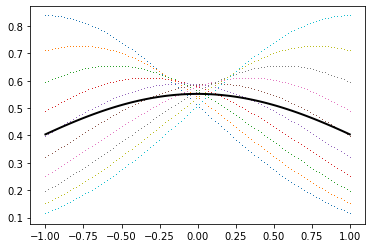

In [12]:
x = np.linspace(a._interval[0], a._interval[1], 100)
y = np.zeros(x.shape)
for f in a._mixture:
    pdf = randy.get_rvs(f.a, f.b, f.loc, f.scale)
    t = pdf(x)
    plt.plot(x, t, ',')
    y += t / len(a._mixture)
plt.plot(x, y, 'k-', lw=2)
plt.show()

<AxesSubplot:ylabel='Count'>

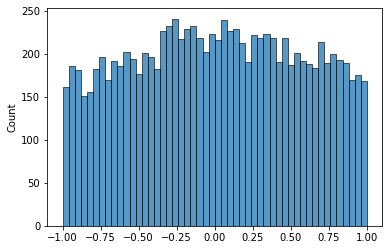

In [13]:
SAMPLES = 10_000
r = [a.sample() for _ in range(SAMPLES)]
#plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
sns.histplot(r, bins=50)

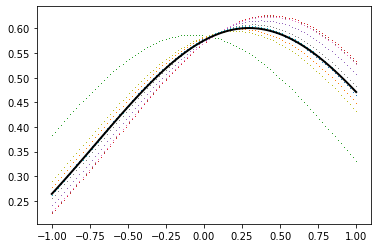

In [16]:
for g in range(10_000):
    x = a.sample()
    y = a.sample()
    if abs(x-.25) < abs(y-.25):
        a.update(winner=x, loser=y)
    else:
        a.update(winner=y, loser=x)

x = np.linspace(a._interval[0], a._interval[1], 100)
y = np.zeros(x.shape)
for f in a._mixture:
    pdf = randy.get_rvs(f.a, f.b, f.loc, f.scale)
    t = pdf(x)
    plt.plot(x, t, ',')
    y += t / len(a._mixture)
plt.plot(x, y, 'k-', lw=2)
plt.show()

<AxesSubplot:ylabel='Count'>

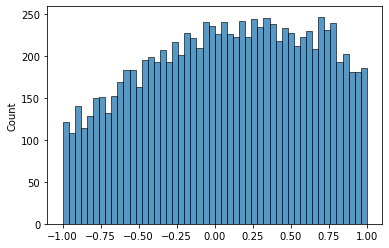

In [17]:
SAMPLES = 10_000
r = [a.sample() for _ in range(SAMPLES)]
#plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
sns.histplot(r, bins=50)